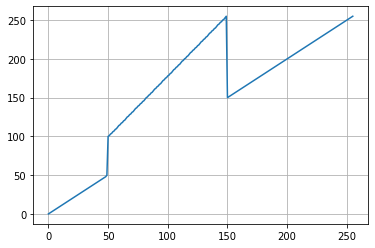

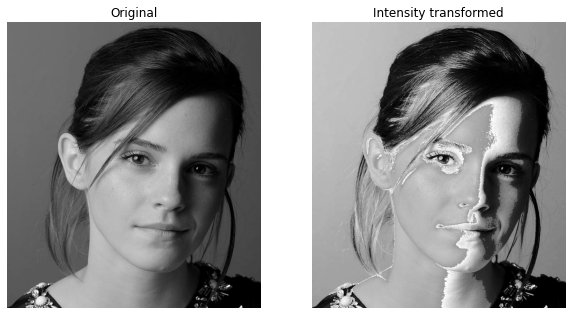

In [3]:
#Q1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r'E:\Current ACA\fund. of image processing & machine vision\Assignments\emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert cv is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
fig,ax = plt.subplots()
assert len(t) == 256
ax.plot(t)
ax.grid('on')
g=cv.LUT(im,t)

fig,ax = plt.subplots(1,2,figsize=(10,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Original')
plt.imshow(im,'gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Intensity transformed')
plt.imshow(g,'gray')

Text(0.5, 1.0, 'Gray matter')

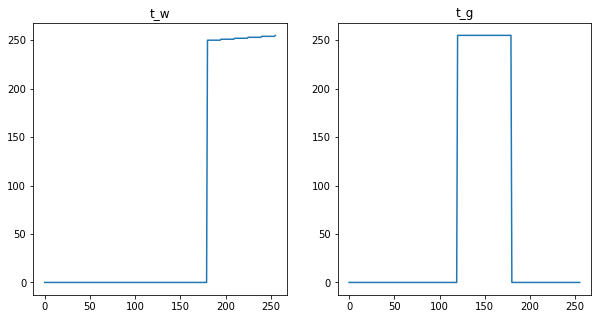

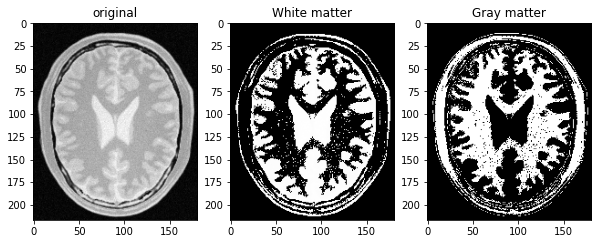

In [11]:
#Q2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r'E:\Current ACA\fund. of image processing & machine vision\Assignments\brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert cv is not None

t1 = np.linspace(0,0,120)
t2 = np.linspace(255,255,60)
t3 = np.linspace(0,0,76)

t4 = np.linspace(0,0,180)
t5 = np.linspace(0,250,0)
t6 = np.linspace(250,255,76)

t_g = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
t_w = np.concatenate((t4,t5,t6),axis=0).astype(np.uint8)
fig,ax = plt.subplots(1,2,figsize=(10,5))
assert len(t) == 256
ax[0].plot(t_w)
ax[0].set_title('t_w')
ax[1].plot(t_g)
ax[1].set_title('t_g')

g_w=cv.LUT(im,t_w)
g_g=cv.LUT(im,t_g)

fig,ax = plt.subplots(1,3,figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(im,'gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(g_w,'gray')
plt.title('White matter')
plt.subplot(1,3,3)
plt.imshow(g_g,'gray')
plt.title('Gray matter')

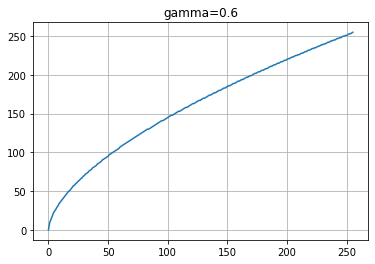

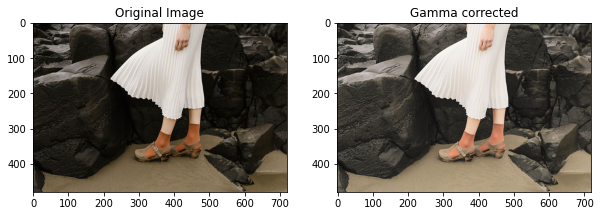

In [5]:
#Q3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_org = cv.imread(r'E:\Current ACA\fund. of image processing & machine vision\Assignments\highlights_and_shadows.jpg')
assert img is not None
img = cv.cvtColor(img_org,cv.COLOR_BGR2RGB)

Lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L,a,b = cv.split(Lab)
gamma = 0.6
t = np.array([(p/255)**gamma*255 for p in range (0,256)]).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)
ax.grid('on')
ax.set_title("gamma="+str(gamma))


g = cv.LUT(L ,t)
transformed = cv.merge([g,a,b])
output_img = cv.cvtColor(transformed,cv.COLOR_LAB2BGR)
fig, axes = plt.subplots(1,2,figsize=(10,10))

axes[0].set_title("Original Image")
axes[0].imshow(img)
axes[1].set_title("Gamma corrected")
axes[1].imshow(output_img)

Text(0.5, 1.0, 'Histogram of the Corrected image')

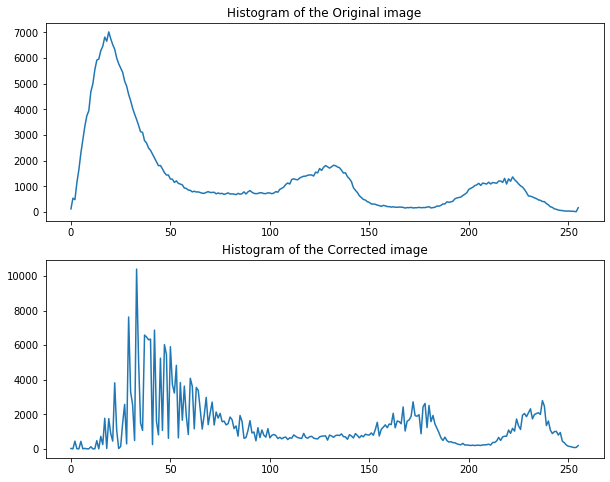

In [6]:
hist_img = cv.calcHist([img],[0],None,[256],[0,256])
hist_g = cv.calcHist([output_img],[0],None,[256],[0,256])

fig, ax  = plt.subplots(2,1,figsize = (10,8))
ax[0].plot(hist_img)
ax[0].set_title("Histogram of the Original image")
ax[1].plot(hist_g)
ax[1].set_title("Histogram of the Corrected image")

Text(0.5, 1.0, 'Histogram equalized')

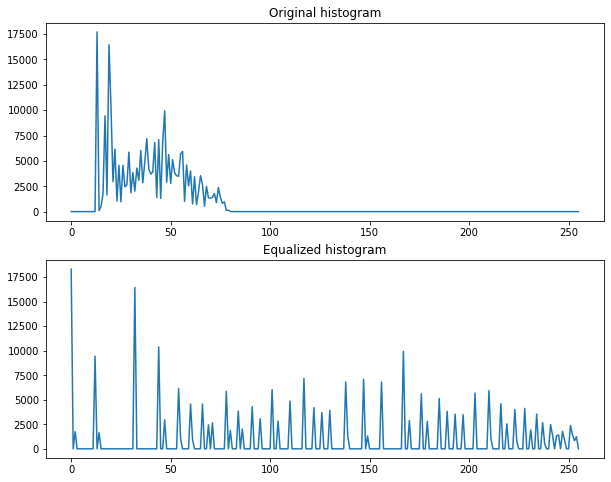

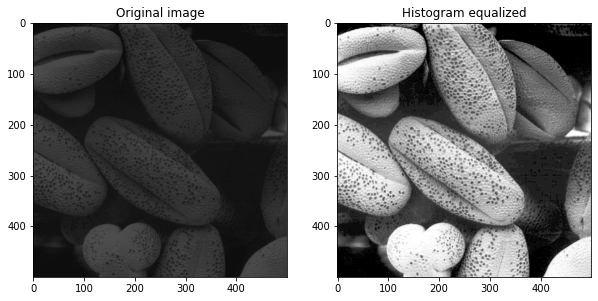

In [13]:
#Q4
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'E:\Current ACA\fund. of image processing & machine vision\Assignments\shells.png',cv.IMREAD_GRAYSCALE)
assert img is not None

hist_f, bins = np.histogram(img.flatten(), 256, [0, 255])
cdf = hist_f.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0)
g = cdf[img.astype('uint8')]
hist_g, bins2 = np.histogram(g.flatten(), 256, [0, 256])

fig,ax=plt.subplots(2,1,figsize=(10,8))
ax[0].plot(hist_f)
ax[0].set_title("Original histogram")
ax[1].plot(hist_g)
ax[1].set_title("Equalized histogram")

fig,ax = plt.subplots(1,2,figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray",vmin=0,vmax=255)
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(g,cmap="gray",vmin=0,vmax=255)
plt.title("Histogram equalized")


In [2]:
#Q5 (a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r'E:\Current ACA\fund. of image processing & machine vision\Assignments\a1q5images\im01small.png',cv.COLOR_BGR2RGB)
assert im is not None

s= 4 #scale
rows = int(s*im.shape[0])
cols = int(s*im.shape[1])

zoomed = np.zeros((rows,cols),dtype = im.dtype)

for i in range(rows):
    for j in range(cols):
        zoomed[i,j] = im[int(i/s),int(j/s)] 

fig,ax = plt.subplots(1,2,figsize =(10,10))
ax[0].imshow(im,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(zoomed,cmap='gray',vmin=-0,vmax=255)

plt.show()


In [1]:
#Q5 (b)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r'E:\Current ACA\fund. of image processing & machine vision\Assignments\a1q5images\im01small.png',cv.IMREAD_GRAYSCALE)
assert im is not None

s= 4 #scale

rows = int(im.shape[0]*s)
cols = int(im.shape[1]*s)
zoomed = np.zeros((rows,cols,3),dtype=im.dtype)

im_pad = cv.copyMakeBorder(im, 0, 1, 0, 1, cv.BORDER_REPLICATE)   #The bottom-row and right-column at the very edge of the original is replicated to the extra border.
  
for i in range(0,rows):
    for j in range(0,cols):

      I,J = int(i/s),int(j/s)

      for k in range(0,3):
        left = (i/s -I) * im_pad[I+1,J,k] + (I+1 - i/s) * im_pad[I,J,k]
        right = (i/s -I) * im_pad[I+1,J+1,k] + (I+1 - i/s) * im_pad[I,J+1,k]
        pixel_value = right * (j/s-J) +left * (J+1 - j/s)
          
        zoomed[i,j,k]=pixel_value

fig,ax = plt.subplots(1,2,figsize =(10,10))
ax[0].imshow(im,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(zoomed,cmap='gray',vmin=-0,vmax=255)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [26]:
#Q5

def SSD(img1,img2):

  ssd = 0
  rows = int(img1.shape[0])
  cols = int(img2.shape[1])

  for i in range(0,rows):
    for j in range(0,cols):
      for k in range(0,3):
        ssd +=  (img1[i,j,k]-img2[i,j,k])**2
  return(ssd)

ssd_1 = SSD(zoomed_im1_near,im_1)
cout << ("image 1 SSD = "+str(ssd_1))
ssd_2 = SSD(zoomed_im2_near,im_2)
cout << ("image 2 SSD = "+str(ssd_2))

In [29]:
#small images
imsmall_1 = cv.imread(r"E:\Current ACA\fund. of image processing & machine vision\Assignments\a1q5images\im01small.png")
assert imsmall_1 is not None
imsmall_2 = cv.imread(r"E:\Current ACA\fund. of image processing & machine vision\Assignments\a1q5images\im02small.png")
assert imsmall_2 is not None
imsmall_3 = cv.imread(r"E:\Current ACA\fund. of image processing & machine vision\Assignments\a1q5images\im03small.png")
assert imsmall_3 is not None


# zoomed images
im_1 = cv.imread(r"E:\Current ACA\fund. of image processing & machine vision\Assignments\a1q5images\im01.png")
assert im_1 is not None
im_2 = cv.imread(r"E:\Current ACA\fund. of image processing & machine vision\Assignments\a1q5images\im02.png")
assert im_2 is not None
im_3 = cv.imread(r"E:\Current ACA\fund. of image processing & machine vision\Assignments\a1q5images\im03.png")
assert im_3 is not None

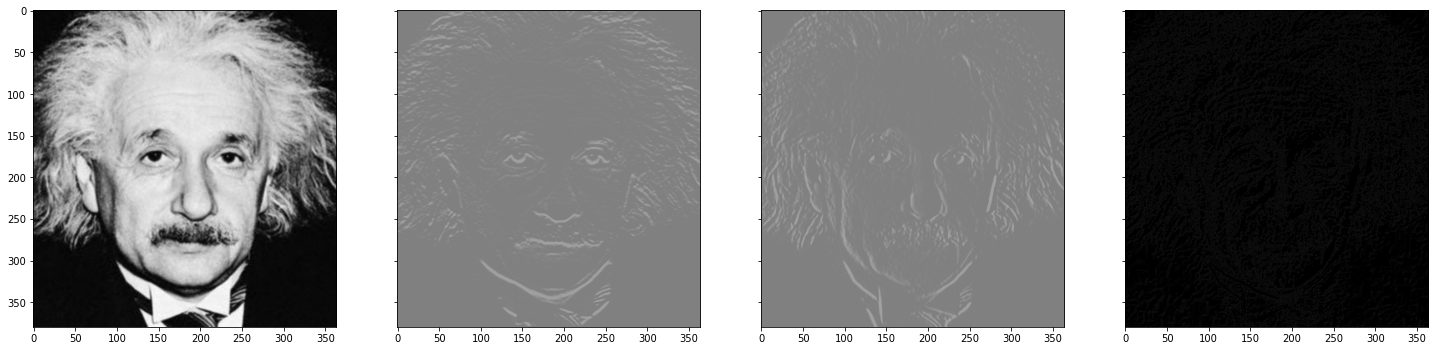

In [7]:
#Q6 (a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r'E:\Current ACA\fund. of image processing & machine vision\Assignments\einstein.png',cv.IMREAD_GRAYSCALE)
assert im is not None

sobel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype =float)
imv = cv.filter2D(im,-1,sobel_v)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype =float)
imh = cv.filter2D(im,-1,sobel_h)
grad_mag = np.sqrt(imv**2+imh**2)

fig,ax = plt.subplots(1,4,sharex ='all',sharey = 'all',figsize =(25,25))
ax[0].imshow(im,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(imv,cmap='gray',vmin=-1020,vmax=1020)
ax[2].imshow(imh,cmap='gray',vmin=-1020,vmax=1020)
ax[3].imshow(grad_mag,cmap='gray',vmin=0,vmax=255)

plt.show()

In [ ]:
#Q6 (b)
def sobel(image,kernal):
  rows = image.shape[0]
  cols = image.shape[1]
  
  h = kernal.shape[0]//2
  l = kernal.shape[1]//2                                                                     # define the padsize for padding
  new_image = cv.copyMakeBorder(image, h, h, l, l, cv.BORDER_CONSTANT, value=0)  # padding the image with "zeros" with size d
  
  output= np.zeros((rows,cols),dtype=image.dtype)
  
  for i in range(h ,rows + h):
    for j in range( d, cols + d):

      output[i-h , j-l] = np.sum( np.multiply( kernal,new_image[ i-h :i+h+1 ,j-l:j+l+1]))
  return(output)

sobelv = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype ='float')
_imv = sobel(image,sobelv)
sobelh = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype ='float')
_imh = sobel(image,sobelh)
_grad_mag = np.sqrt(imv**2+imh**2)

fig,ax = plt.subplots(1,4,sharex ='all',sharey = 'all',figsize =(25,25))
ax[0].imshow(im,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(_imv,cmap='gray',vmin=-1020,vmax=1020)
ax[2].imshow(_imh,cmap='gray',vmin=-1020,vmax=1020)
ax[3].imshow(_grad_mag,cmap='gray')#,vmin=-100,vmax=100)

plt.show()

Text(0.5, 1.0, 'Enhanched Image')

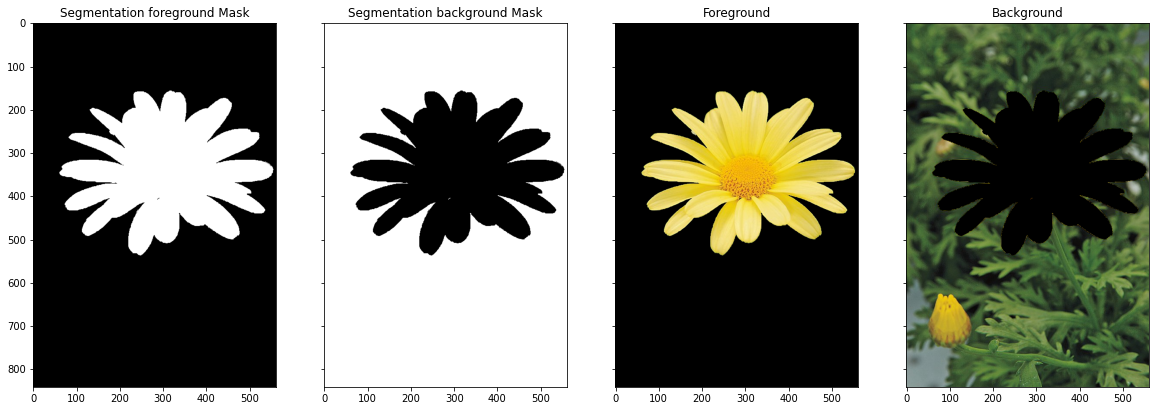

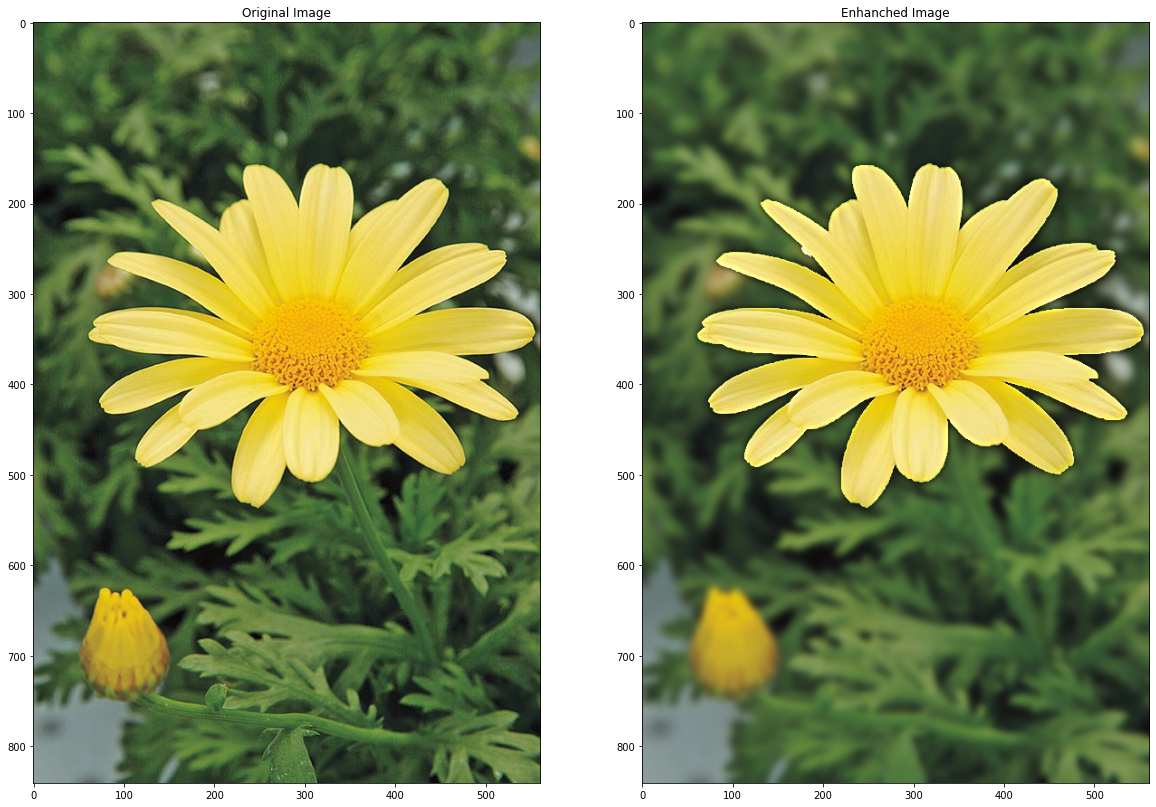

In [11]:
#Q7
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread(r'E:\Current ACA\fund. of image processing & machine vision\Assignments\daisy.jpg')
assert image is not None

imgRGB = cv.cvtColor(image,cv.COLOR_BGR2RGB)
mask1 = np.zeros(image.shape[:2], np.uint8)

fgModel = np.zeros((1,65), np.float64)
bgModel = np.zeros((1,65), np.float64)

rect = (50,150,520,400)

cv.grabCut(image, mask1, rect, bgModel, fgModel, 5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask1==2) | (mask1==0), 0,1).astype('uint8')
mask3 = np.where((mask1==1) | (mask1==3), 0,1).astype('uint8')

imgcut = image * mask2[:,:,np.newaxis]
imgback = image * mask3[:,:,np.newaxis]

imgcutRGB = cv.cvtColor(imgcut,cv.COLOR_BGR2RGB)
imgbackRGB = cv.cvtColor(imgback,cv.COLOR_BGR2RGB)

imgbackBlur = cv.GaussianBlur(imgback,(23,23),0)
imgenhanced = cv.add(imgcut ,imgbackBlur)
imgenhancedRGB = cv.cvtColor(imgenhanced,cv.COLOR_BGR2RGB)


fig,ax = plt.subplots(1,4,sharex='all',sharey='all',figsize=(20,20))
ax[0].imshow(mask2, cmap="gray")
ax[0].set_title("Segmentation foreground Mask")

ax[1].imshow(mask3, cmap="gray")
ax[1].set_title("Segmentation background Mask")

ax[2].imshow(imgcutRGB)
ax[2].set_title("Foreground")

ax[3].imshow(imgbackRGB)
ax[3].set_title("Background")


fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(imgRGB)
ax[0].set_title("Original Image")
ax[1].imshow(imgenhancedRGB)
ax[1].set_title("Enhanched Image")
